In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_dir = r"D:\guvi\data\emotion\train"
test_dir =  r"D:\guvi\data\emotion\test"
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest')

In [31]:
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)
val_generator = data_generator.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [32]:
len(train_generator),len(val_generator)

(898, 225)

In [33]:
label_names = list(train_generator.class_indices.keys())
print( label_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [34]:
image_batch, label_batch = next(train_generator)
print(image_batch.shape, label_batch.shape)

(32, 128, 128, 3) (32, 7)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization,Activation
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

In [37]:
model = Sequential()
model.add(Conv2D(16, (3,3),padding='same',kernel_regularizer=l2(0.001), input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3),padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),padding='same',kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
          

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,197,671 (8.38 MB)

 Trainable params: 2,197,159 (8.38 MB)

 Non-trainable params: 512 (2.00 KB)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True)

In [39]:
print(model.input_shape)  
print(model.output_shape) 

(None, 128, 128, 3)
(None, 7)


In [40]:
history = model.fit(train_generator, epochs=50, validation_data=val_generator,callbacks=[early_stopping])

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 351s 388ms/step - accuracy: 0.2397 - loss: 2.2166 - val_accuracy: 0.2576 - val_loss: 1.8888
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 408s 454ms/step - accuracy: 0.2685 - loss: 1.8212 - val_accuracy: 0.3061 - val_loss: 1.7589
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 339s 377ms/step - accuracy: 0.2990 - loss: 1.7577 - val_accuracy: 0.3054 - val_loss: 1.7473
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 340s 379ms/step - accuracy: 0.3134 - loss: 1.7308 - val_accuracy: 0.3079 - val_loss: 1.7330
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 347s 387ms/step - accuracy: 0.3276 - loss: 1.7120 - val_accuracy: 0.3410 - val_loss: 1.7033
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 351s 391ms/step - accuracy: 0.3545 - loss: 1.6793 - val_accuracy: 0.3702 - val_loss: 1.6403
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 363s 404ms/step - accuracy: 0.3744 - loss: 1.6439 - val_accuracy: 0.3780 - val_loss: 1.6651
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 386s 430ms/step - accuracy: 0.3782 -

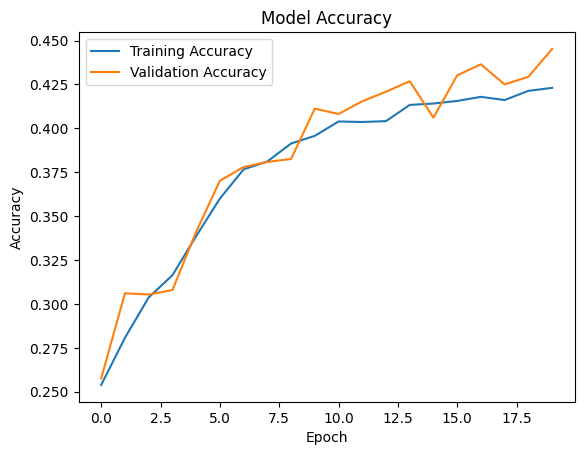

In [41]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [46]:
image = "PrivateTest_77781106.jpg"
image = tf.keras.utils.load_img(image,target_size=(128,128))
image_array = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_array,axis=0)

In [47]:
prediction = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


In [48]:
score = tf.nn.softmax(prediction)
print('image is with {} accuracy of {:0.2f} '.format(label_names[np.argmax(score)],np.max(score)*100))

image is with fear accuracy of 29.86 


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step 1: Get true labels and predictions
# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Iterate over the validation generator
for images, labels in val_generator:
    # Predict on the batch of images
    batch_preds = model.predict(images)
    # Convert predictions from probabilities to class indices
    batch_preds = np.argmax(batch_preds, axis=1)
    # Convert true labels from one-hot encoded to class indices
    batch_labels = np.argmax(labels, axis=1)
    
    # Append to the lists
    true_labels.extend(batch_labels)
    predictions.extend(batch_preds)
    
    # Stop when we've processed the entire validation set
    if len(true_labels) >= val_generator.samples:
        break

# Step 2: Generate the classification report
# Get the class names from the generator
class_names = list(val_generator.class_indices.keys())

# Generate the classification report
report = classification_report(true_labels, predictions, target_names=class_names)
print("Classification Report:")
print(report)

# Optional: Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 